# Python and Pandas Refresher

#### Overview
Welcome to of the Professional XGBoost course! This week is all about ensuring you have a strong foundation in Python and Pandas, which are crucial for any data science work. By the end of this week, you'll be comfortable with data manipulation and preprocessing tasks, setting you up for success in the subsequent weeks.

## Python

## Classes

Classes are a fundamental part of modern programming languages. Python makes it easy to make a class and use it to create objects. 

Here is a simple class definition:


In [ ]:
class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species

    def make_sound(self, sound):
        print(f"{self.name} the {self.species} says {sound}")

# Create an instance of the Animal class
dog = Animal("Buddy", "Dog")
dog.make_sound("Woof")

### Sklearn Custom Pipeline Transformer

In data science, especially with sklearn, creating custom transformers can be very useful for preprocessing data. This example will show you how to create a custom transformer by defining a Python class that inherits from `BaseEstimator` and `TransformerMixin`.

### Example: Custom Transformer for Sklearn Pipeline

**Objective**: Create a custom transformer that adds a new feature to the dataset.


In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class AddSquareFeature(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self  # Nothing to fit

    def transform(self, X, y=None):
        return (X
                .assign(**{f'{self.column}_squared': 
                           lambda df_: df_[self.column] ** 2})
        )


In [2]:
# Example usage with a DataFrame
data = {
    'feature1': [1, 2, 3],
    'feature2': [4, 5, 6]
}

df = pd.DataFrame(data)

# Create an instance of the custom transformer
transformer = AddSquareFeature(column='feature1')

# Transform the DataFrame
transformed_df = transformer.fit_transform(df)
print(transformed_df)

   feature1  feature2  feature1_squared
0         1         4                 1
1         2         5                 4
2         3         6                 9




### Integration with Sklearn Pipeline

You can integrate this custom transformer into an sklearn pipeline to streamline your data preprocessing workflow.


In [3]:

from sklearn.pipeline import Pipeline

# Create a pipeline with the custom transformer
pipeline = Pipeline([
    ('add_square_feature', AddSquareFeature(column='feature1'))
])

# Apply the pipeline to the DataFrame
transformed_df = pipeline.fit_transform(df)
print(transformed_df)



   feature1  feature2  feature1_squared
0         1         4                 1
1         2         5                 4
2         3         6                 9


## Python Functions and Lambdas



Functions and lambdas are essential tools in Python that enable you to write modular, reusable, and efficient code. This lesson will cover the basics of defining and using functions, followed by an introduction to lambda functions for quick, inline operations, illustrated with real-world examples using Pandas.

### Python Functions

Functions are blocks of code that perform a specific task. They help you organize your code, avoid repetition, and make it easier to debug and maintain.

**Key Concepts:**
- **Defining a Function**: Use the `def` keyword, followed by the function name and parentheses `()`. Inside the parentheses, you can define parameters.
- **Calling a Function**: Use the function name followed by parentheses and provide arguments if required.
- **Returning Values**: Functions can return values using the `return` statement.

**Syntax:**
```python
def function_name(parameters):
    # Function body
    return value
```

**Example: Basic Function**


In [4]:
def greet(name):
    return f"Hello, {name}!"

In [5]:
# A function is an object
greet

<function __main__.greet(name)>

In [6]:

# Calling the function
print(greet("Alice"))


Hello, Alice!



### Parameters and Arguments

Functions can take multiple parameters and return multiple values.

**Example: Function with Multiple Parameters**



In [7]:
def add(a, b):
    return a + b

# Calling the function
print(add(5, 3))

8



### Default Parameters

You can provide default values for parameters. This makes the parameter optional when calling the function.

**Example: Function with Default Parameters**


In [8]:
def greet(name, message="Hello"):
    return f"{message}, {name}!"

# Calling the function with and without the default parameter
print(greet("Alice"))
print(greet("Bob", "Hi"))

Hello, Alice!
Hi, Bob!



### Lambda Functions

Lambda functions, also known as anonymous functions, are small, single-expression functions that are defined using the `lambda` keyword. They are useful for quick, throwaway functions and are often used in conjunction with functions like `map()`, `filter()`, and `sorted()`.

**Syntax:**
```python
lambda parameters: expression
```

**Example: Basic Lambda Function**


In [9]:
# Regular function
def add(a, b):
    return a + b

# Equivalent lambda function
add_lambda = lambda a, b: a + b

# Calling the lambda function
print(add_lambda(5, 3))  # Output: 8

8


In this example, there isn't much difference between the lambda function and a regular function. However, lambda functions have one key feature, they are *expression-based*, meaning they can only contain a single expression. Normal functions are *statement-based*.
In effective, this means that you can embed a lambda function into places where you couldn't use a normal function, like:

- as an argument to higher-order functions (functions that take other functions as arguments)
- inside list comprehensions

We use them in Pandas all the time.


### Using Lambda Functions with Pandas

Lambda functions are often used with Pandas for quick data transformations. Here are some real-world examples using `.assign`, `.loc`, and `.groupby().apply()`.

**Example: Using Lambda with `.assign`**

The `.assign` method is used to add new columns to a DataFrame or modify existing ones.

A key feature in Pandas is that if you pass a callable to `.assign`, it will be evaluated in the context of the current state of the DataFrame. This means you can use lambda functions to access newly created columns within the same `.assign` call.

In [13]:
import pandas as pd

# Sample data
data = {
    'real_value': [10, 20, 30, 40, 50],
    'predicted_value': [12, 18, 33, 45, 49]
}

df = pd.DataFrame(data)


# Add a new column error (with a normal function) and squared error (with a lambda function)
def residual(df_):
    # the residual is the difference between the real and predicted values
    return df_['real_value'] - df_['predicted_value']

(df
 .assign(error=residual,
         squared_error=lambda df_: residual(df_) ** 2,
         sq_err=lambda df_: df_.error **2
        )
)

,real_value,predicted_value,error,squared_error,sq_err
0,10,12,-2,4,4
1,20,18,2,4,4
2,30,33,-3,9,9
3,40,45,-5,25,25
4,50,49,1,1,1




**Example: Using Lambda with `.loc`**

The `.loc` method is used to access a group of rows and columns by labels or a boolean array.



In [18]:
(df
 .assign(error=residual,
         squared_error=lambda df_: residual(df_) ** 2)
 #.loc[lambda df_: df_['squared_error'] > 9]
 # or 
 .query('squared_error > 9')
)

,real_value,predicted_value,error,squared_error
3,40,45,-5,25



**Example: Using Lambda with `.groupby().apply()`**

The `.groupby().apply()` method is used to apply a function to each group of a DataFrame.


In [22]:
# Sample data with groups
data = {
    'group': ['A', 'A', 'A', 'C', 'C', 'C', 'C'],
    'value': [10, 20, 30, 40, 50, 60, 70]
}

df = pd.DataFrame(data)

# Define a function to normalize values within each group
def normalize(group):
    min_val = group.min()
    max_val = group.max()
    return (group - min_val) / (max_val - min_val)

# Apply the normalization function to each group
(df
 .groupby('group')
 ['value']
 .transform(normalize)
 )

0    0.000000
1    0.500000
2    1.000000
3    0.000000
4    0.333333
5    0.666667
6    1.000000
Name: value, dtype: float64

In [23]:
(df
 .groupby('group')['value'].transform(lambda g: (g - g.min()) / (g.max() - g.min()))
 )

0    0.000000
1    0.500000
2    1.000000
3    0.000000
4    0.333333
5    0.666667
6    1.000000
Name: value, dtype: float64

In [24]:
(df
 .assign(normalized_value=
         lambda df_: df_.groupby('group')['value'].transform(normalize))
)


,group,value,normalized_value
0,A,10,0.000000
1,A,20,0.500000
2,A,30,1.000000
3,C,40,0.000000
4,C,50,0.333333
5,C,60,0.666667
6,C,70,1.000000


## Unpacking Positional and Keyword Arguments in Python


Understanding how to unpack positional and keyword arguments in Python is essential for working with functions that accept a variable number of arguments. 

### Positional and Keyword Arguments

**Positional Arguments:**
- Positional arguments are arguments that need to be included in the proper position or order.

Here is an example:


In [25]:

def greet(name, message):
    return f"Hello, {name}! {message}"

print(greet("Alice", "Good morning!"))  # Output: Hello, Alice! Good morning!

Hello, Alice! Good morning!



You need to pass in the arguments in the correct order for the function to work as expected.

**Keyword Arguments:**
- Keyword arguments are arguments that are passed to a function by explicitly specifying the parameter name.

Here is an example: 


In [26]:
def greet(name, message):
    return f"Hello, {name}! {message}"

print(greet(message="Good morning!", name="Alice"))  # Output: Hello, Alice! Good morning!

Hello, Alice! Good morning!



If you specify the parameter names when calling the function, the order does not matter.

### Unpacking Positional and Keyword Arguments

Python provides a way to unpack positional arguments using `*` and keyword arguments using `**`.

**Unpacking Positional Arguments:**
- `*args` allows a function to accept any number of positional arguments.

**Unpacking Keyword Arguments:**
- `**kwargs` allows a function to accept any number of keyword arguments.

**Example:**


In [27]:
def print_args(*args):
    for arg in args:
        print(arg)

def print_kwargs(**kwargs):
    for key, value in kwargs.items():
        print(f"{key}: {value}")

print_args(1, 2, 3)  # Output: 1 2 3
print_kwargs(a=1, b=2, c=3)  # Output: a: 1, b: 2, c: 3


1
2
3
a: 1
b: 2
c: 3


### Using Sequences and Dictionaries with Functions

If you happen to have a list or tuple of values that you want to pass as arguments to a function, you can use the `*` operator to unpack the sequence.

In [28]:
args = (1, 2, 3)
print_args(*args)  # Output: 1 2 3

1
2
3


If you have a dictionary of key-value pairs that you want to pass as keyword arguments to a function, you can use the `**` operator to unpack the dictionary.

In [29]:
kwargs = {'a': 1, 'b': 2, 'c': 3}
print_kwargs(**kwargs)  # Output: a: 1, b: 2, c: 3

a: 1
b: 2
c: 3


Let's use Pandas to create a new column for every numeric column in a DataFrame with the double of the values.

In [31]:
# Sample data with groups
data = {
    'group': ['A', 'A', 'A', 'C', 'C', 'C', 'C'],
    'value': [10, 20, 30, 40, 50, 60, 70],
    'other_value': [78, 56, 45, 34, 23, 12, 1]
}

df = pd.DataFrame(data)

(df
 .assign(**{f'{col}_double':df[col]*2 
            for col in df.select_dtypes(include='number').columns})
 )

,group,value,other_value,value_double,other_value_double
0,A,10,78,20,156
1,A,20,56,40,112
2,A,30,45,60,90
3,C,40,34,80,68
4,C,50,23,100,46
5,C,60,12,120,24
6,C,70,1,140,2


In [34]:
# use .pipe with a lambda if you are deep in a chain
(df
 .groupby('group').mean()
 .assign(**{f'{col}_double':df[col]*2 
            for col in df.select_dtypes(include='number').columns})
 )

,value,other_value,value_double,other_value_double
group,,,,
A,20.0,59.666667,NaN,NaN
C,55.0,17.500000,NaN,NaN


In [35]:
# use .pipe with a lambda if you are deep in a chain
(df
 .groupby('group').mean()
 .pipe(lambda df_: df_
    .assign(**{f'{col}_double':df_[col]*2 
                for col in df_.select_dtypes(include='number').columns})
 )
 )

,value,other_value,value_double,other_value_double
group,,,,
A,20.0,59.666667,40.0,119.333333
C,55.0,17.500000,110.0,35.000000


## Pandas Key Topics

### Lesson: Mastering the `.assign` Method in Pandas

The `.assign` method in Pandas is a powerful and convenient way to add new columns to a DataFrame or modify existing ones. 

The `.assign` method allows you to add or modify columns in a DataFrame. It returns a new DataFrame, which means it does not modify the original DataFrame. This promotes a functional programming style, making your code more readable and less prone to errors.

**Syntax:**
```python
DataFrame.assign(**kwargs)
```
Where `**kwargs` are key-value pairs, with the key being the new or existing column name and the value being the data or transformation applied to that column.

### Key Benefits of `.assign`

1. **Chainable**: The `.assign` method can be used in method chaining, which allows you to perform multiple data transformations in a single, readable statement.
2. **Readable**: It makes your code more readable by explicitly showing which columns are being added or modified.
3. **Non-destructive**: Since `.assign` returns a new DataFrame, it preserves the original DataFrame, preventing accidental modifications.

### Real-World Examples

**Example 1: Adding New Columns**

Imagine you have a DataFrame containing sales data, and you want to add a new column that calculates the total sales by multiplying the quantity sold by the price per unit.


In [36]:
import pandas as pd

# Sample data
data = {
    'product': ['A', 'B', 'C'],
    'quantity_sold': [10, 15, 20],
    'price_per_unit': [5, 7, 10]
}

df = pd.DataFrame(data)

# Using .assign to add a new column
df = df.assign(
    total_sales=lambda df_: df_['quantity_sold'] * df_['price_per_unit'])
print(df)

  product  quantity_sold  price_per_unit  total_sales
0       A             10               5           50
1       B             15               7          105
2       C             20              10          200




**Example 2: Combining `.assign` with Other Pandas Methods**

You have a DataFrame with student grades, and you want to normalize the grades and then categorize them as 'Pass' or 'Fail' based on a threshold.


In [39]:
data = {
    'student': ['Alice', 'Bob', 'Charlie'],
    'grade': [85, 58, 92]
}

df = pd.DataFrame(data)

def normalize(df_, col):
    col_max = df_[col].max()
    col_min = df_[col].min()
    return (df_[col] - col_min) / (col_max - col_min)


# Using .assign in combination with .apply and method chaining
(df
    .assign(normalized_grade=lambda df_: normalize(df_, col='grade'),
            status=lambda df_: df_['normalized_grade'].case_when(
                caselist=[(df_['normalized_grade'] >= 0.6, 'Pass'),
                        (pd.Series(True, index=df_.index), 'Fail')])
    )
)

,student,grade,normalized_grade,status
0,Alice,85,0.794118,Pass
1,Bob,58,0.000000,Fail
2,Charlie,92,1.000000,Pass


## Plotting with Pandas

Pandas provides a convenient interface to create basic plots using the `.plot()` method. 

There are 4 main plot types that I believe give you the most bang for your buck:

1. Line plot
2. Bar plot
3. Histogram
4. Scatter plot

If you master these 4, you'll be able to create a wide variety of plots for your data analysis projects.

### Load Data

This is the data from Fuel Economy dataset. We will use this data to create some plots.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'

raw_data = pd.read_csv(url, dtype_backend='pyarrow', engine='pyarrow')
raw_data

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
41140,14.33087,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
41141,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0
41142,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,<NA>,<NA>,0.0,<NA>,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,<NA>,0,0,0


### Line Plots

Line plots are useful for visualizing trends over time or any ordered data. You should use them when:

- You have a continuous variable that is ordered.
- You want to see the trend of a variable over time.
- You have multiple groups and want to compare them.

Usually the x-axis is used for the variable that is ordered, and the y-axis is used for the variable that you want to measure.

The key thing to realize in Pandas is that the index of the DataFrame is used for the x-axis, and each column is used for the y-axis.
If you only have a Series, you will have a single line plot. If you have a DataFrame, you will have multiple lines on the same plot.

Let's look at the average MPG for Ford cars over the years.

In [45]:
(raw_data
 .query('make == "Ford" and VClass == "Compact Cars"')
 .groupby('year')
 .city08
 .mean()
)

year
1984    21.424242
1985    21.903226
1986      22.0625
1987         21.0
1988    19.928571
1989    21.076923
1990    19.928571
1991    20.066667
1992      20.0625
1993    21.666667
1994       21.125
1995        21.25
1996       20.875
1997    20.666667
1998         20.5
1999    20.333333
2000         21.3
2001         22.8
2002    22.333333
2003    21.857143
2004    21.714286
2005    21.333333
2006    21.666667
2007    22.333333
2008         24.0
2009         24.0
2010         24.0
2011         25.0
2012    36.222222
2013    35.666667
2014         34.5
2015    34.181818
2016         35.2
2017         35.5
2018    39.428571
2019         25.0
Name: city08, dtype: double[pyarrow]

<AxesSubplot: xlabel='year'>

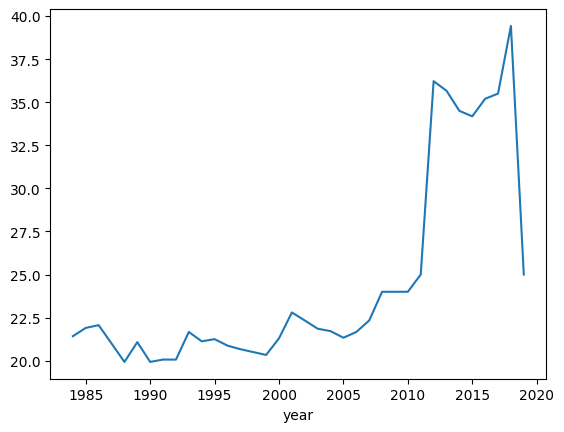

In [46]:
(raw_data
 .query('make == "Ford" and VClass == "Compact Cars"')
 .groupby('year')
 .city08
 .mean()
 .plot()
)

Let's compare the average MPG for Ford, BWM, Honda, and Toyota cars over the years.

<AxesSubplot: xlabel='year,make'>

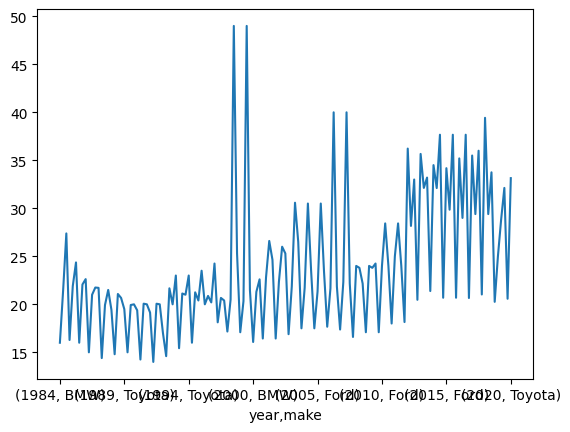

In [50]:
makes = ['Ford', 'BMW', 'Toyota', 'Honda']
(raw_data
 .query('make in @makes and VClass == "Compact Cars"')
 .groupby(['year', 'make'])
 .city08
 .mean()
 .plot()
)

<AxesSubplot: xlabel='year'>

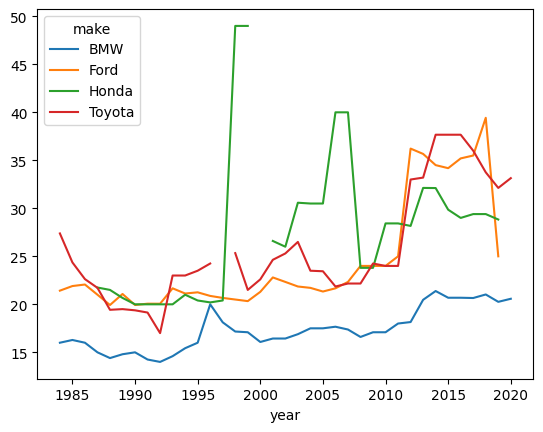

In [53]:
makes = ['Ford', 'BMW', 'Toyota', 'Honda']
(raw_data
 .query('make in @makes and VClass == "Compact Cars"')
 .groupby(['year', 'make'])
 .city08
 .mean()
 .unstack()
 .plot()
)

<AxesSubplot: xlabel='year'>

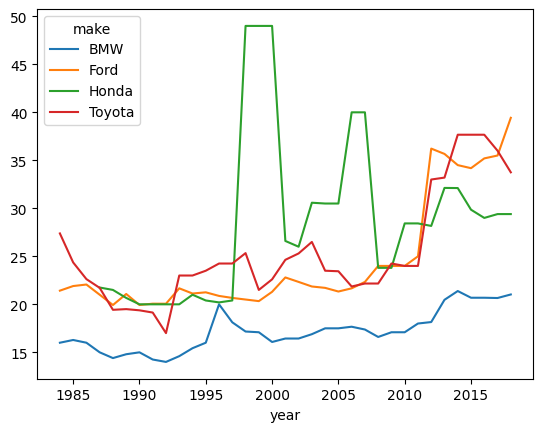

In [54]:
makes = ['Ford', 'BMW', 'Toyota', 'Honda']
(raw_data
 .query('make in @makes and VClass == "Compact Cars"')
 .groupby(['year', 'make'])
 .city08
 .mean()
 .unstack()
 .ffill()
 .loc[:2018]
 .plot()
)

### Bar Plots

Bar plots are useful for visualizing the distribution of categorical data. You should use them when:

- You have a categorical variable.
- You want to compare the values of the variable.
- You are tempted to use a pie chart.

The x-axis is used for the categorical variable, and the y-axis is used for the variable that you want to measure.
In pandas, the index of the DataFrame is used for the x-axis, and each column is used for the y-axis. So you want to make sure that the index is the categorical variable. I often tack this on after doing a `.value_counts()` call.



In [57]:
(raw_data
 .make
 .value_counts()
)

make
Chevrolet                           4003
Ford                                3371
Dodge                               2583
GMC                                 2494
Toyota                              2071
                                    ... 
Grumman Allied Industries              1
Environmental Rsch and Devp Corp       1
General Motors                         1
Goldacre                               1
Isis Imports Ltd                       1
Name: count, Length: 136, dtype: int64[pyarrow]

<AxesSubplot: xlabel='make'>

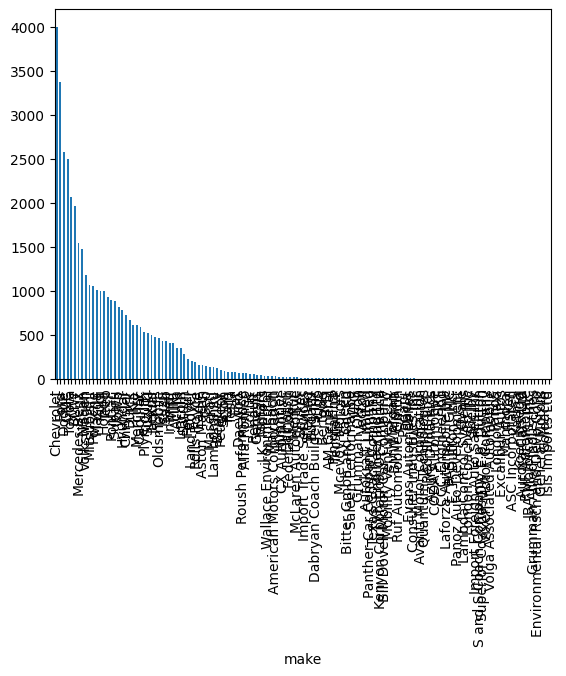

In [58]:
(raw_data
 .make
 .value_counts()
 .plot.bar()
)

<AxesSubplot: xlabel='make'>

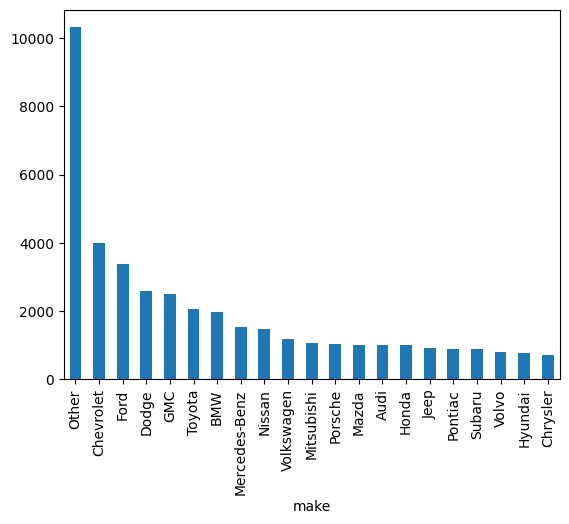

In [64]:
n = 20
top_n_makes = (raw_data
    .make
    .value_counts()
    .nlargest(n)
    .index
    )

(raw_data
 .assign(make=lambda df_: df_['make'].where(df_['make'].isin(top_n_makes), 'Other'))
 .make
 .value_counts()
 .plot.bar()
)

<AxesSubplot: ylabel='make'>

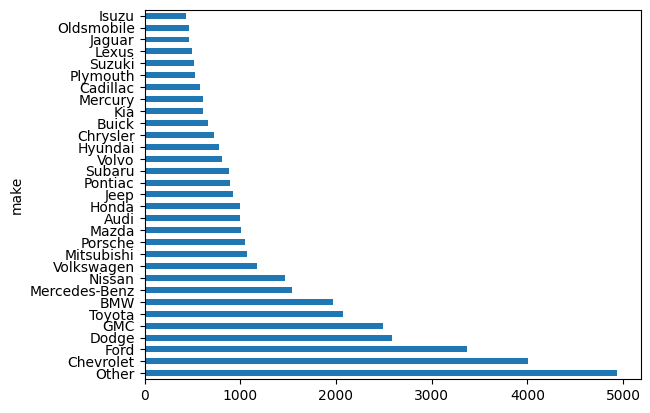

In [67]:
n = 30
top_n_makes = (raw_data
    .make
    .value_counts()
    .nlargest(n)
    .index
    )

(raw_data
 .assign(make=lambda df_: df_['make'].where(df_['make'].isin(top_n_makes), 'Other'))
 .make
 .value_counts()
 .plot.barh()
)

<AxesSubplot: ylabel='make'>

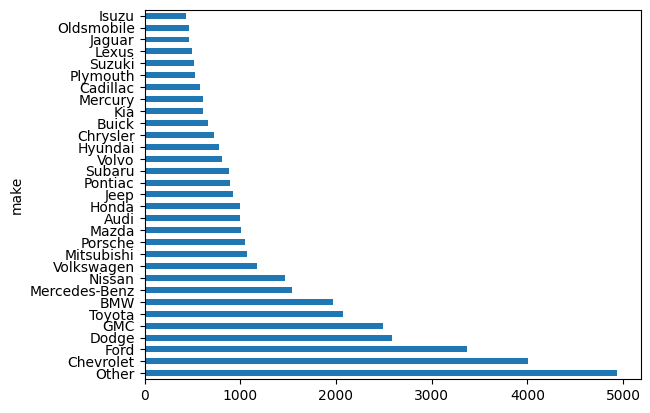

In [68]:
n = 30
top_n_makes = (raw_data
    .make
    .value_counts()
    .nlargest(n)
    .index
    )

(raw_data
 .assign(make=lambda df_: df_['make'].case_when(
     caselist=[(df_['make'].isin(top_n_makes), df_['make']),
               (pd.Series(True, index=df_.index), 'Other')])
 )
 .make
 .value_counts()
 .plot.barh()
)


Let's look at the count of models for each manufacturer.

In [69]:
(raw_data
 .groupby('make')
 .model
 .nunique()
)

make
AM General                      4
ASC Incorporated                1
Acura                          45
Alfa Romeo                     12
American Motors Corporation     4
                               ..
Volkswagen                     74
Volvo                          89
Wallace Environmental          18
Yugo                            4
smart                           8
Name: model, Length: 136, dtype: int64

<AxesSubplot: ylabel='make'>

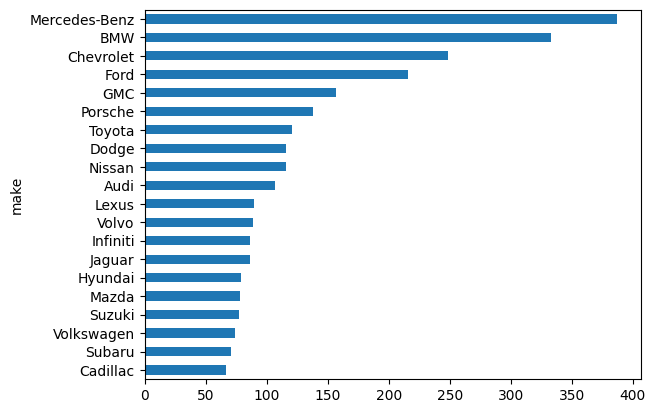

In [74]:
(raw_data
 .groupby('make')
 .model
 .nunique()
 .sort_values()
 .tail(20)
.plot.barh()
)

When we use PCA, we often create a bar plot to show the weight of each principal component.

In [75]:
from sklearn import decomposition, preprocessing, set_config
set_config(transform_output='pandas')
cols = ['barrels08','city08',
        'co2',
       'comb08', 'cylinders',
       'displ', 'fuelCost08', 'highway08', 'year',
       ]
X = (raw_data
 .loc[:, cols]
    .dropna()
    )

pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(preprocessing.StandardScaler().fit_transform(X))

In [76]:
X_pca

,pca0,pca1,pca2
0,1.075071,-1.744313,-0.542018
1,-5.803141,-0.515239,1.079690
2,2.877206,-1.514224,0.614133
3,-5.163462,-1.040983,-0.170337
4,0.087959,-1.248663,-0.927031
...,...,...,...
41139,1.344085,-1.212001,-0.397885
41140,1.713808,-1.163216,-0.162432
41141,0.939380,-1.256707,-0.636919
41142,0.939380,-1.256707,-0.636919


In [77]:
pca.components_

array([[-0.39154052,  0.38647835,  0.05382812,  0.39403425, -0.3378193 ,
        -0.35150658, -0.38192386,  0.38582857,  0.08223003],
       [-0.04175167,  0.02906903,  0.6631698 ,  0.05301189,  0.23914826,
         0.20230131,  0.06019176,  0.09305258,  0.66663919],
       [-0.06086915,  0.30162411, -0.36449404,  0.30458295,  0.57699788,
         0.49291566, -0.03536125,  0.31122588, -0.07541085]])

In [78]:
pd.DataFrame(pca.components_, columns=cols, index=[f'PC{i+1}' for i in range(3)])

,barrels08,city08,co2,comb08,cylinders,displ,fuelCost08,highway08,year
PC1,-0.391541,0.386478,0.053828,0.394034,-0.337819,-0.351507,-0.381924,0.385829,0.082230
PC2,-0.041752,0.029069,0.663170,0.053012,0.239148,0.202301,0.060192,0.093053,0.666639
PC3,-0.060869,0.301624,-0.364494,0.304583,0.576998,0.492916,-0.035361,0.311226,-0.075411


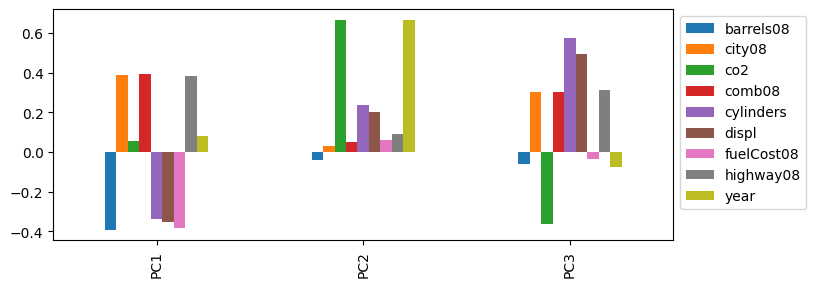

In [84]:
(pd.DataFrame(pca.components_, columns=cols, index=[f'PC{i+1}' for i in range(3)])
 .plot.bar(figsize=(8,3))
 .legend(bbox_to_anchor=(1, 1))
)


###  Histograms

Histograms are useful for visualizing the distribution of a single continuous variable. You should use them when:

- You have a continuous variable.
- You want to see the distribution of the variable.
- You want to see if the variable is normally distributed.
- You want to see if there are any outliers.

In pandas, you can create a histogram by calling the `.plot.hist()` method on a Series or DataFrame. Generally, we just do it on a series.

In the x-axis, you have the bins, which are the intervals that the data is grouped into. In the y-axis, you have the frequency, which is the number of data points in each bin.

<AxesSubplot: ylabel='Frequency'>

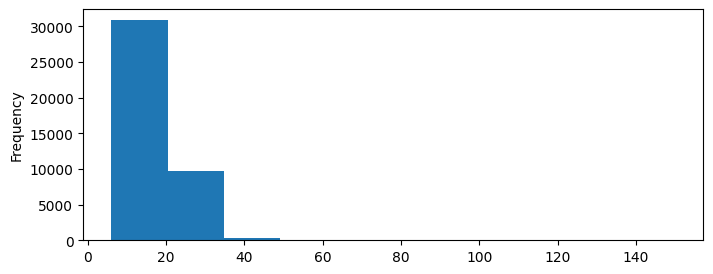

In [85]:
(raw_data
 .city08
 .plot.hist(figsize=(8,3))
)

<AxesSubplot: ylabel='Frequency'>

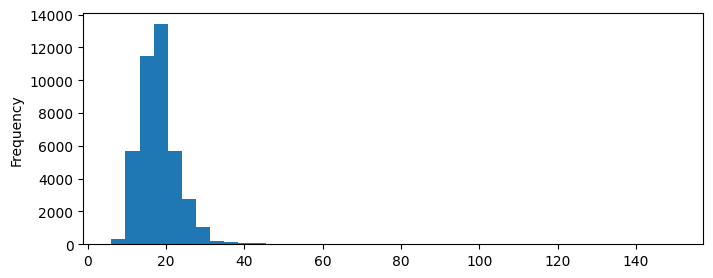

In [86]:
(raw_data
 .city08
 .plot.hist(bins=40, figsize=(8,3))
)

<AxesSubplot: ylabel='Frequency'>

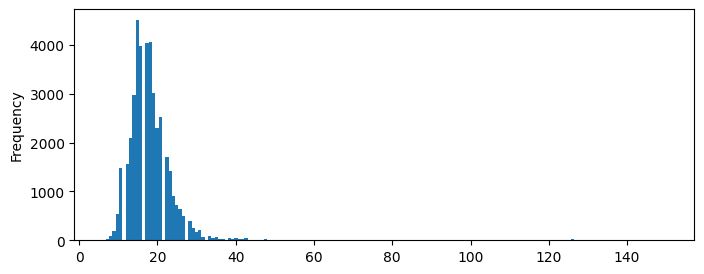

In [92]:
(raw_data
 .city08
 .plot.hist(bins=171, figsize=(8,3))
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_7901/3004991135.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('city08 > 40')


<AxesSubplot: ylabel='Frequency'>

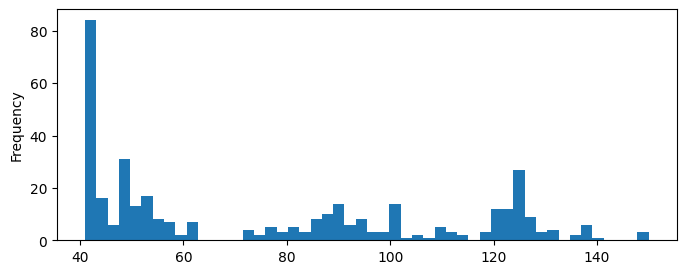

In [93]:
(raw_data
 .query('city08 > 40')
 .city08
 .plot.hist(bins=50, figsize=(8,3))
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_7901/2450257297.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('city08 < 40')


<AxesSubplot: ylabel='Frequency'>

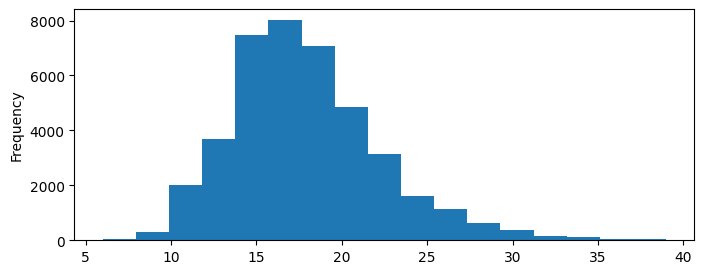

In [100]:
(raw_data
 .query('city08 < 40')
 .city08
 .plot.hist(bins=17, figsize=(8,3))
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_7901/3856656227.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('city08 < 40')


<AxesSubplot: ylabel='Density'>

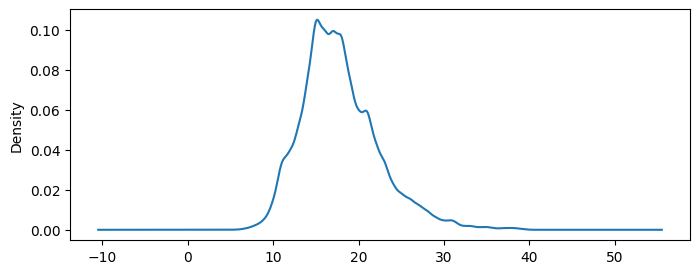

In [99]:
(raw_data
 .query('city08 < 40')
 .city08
 .plot.kde(figsize=(8,3))
)

<AxesSubplot: ylabel='Frequency'>

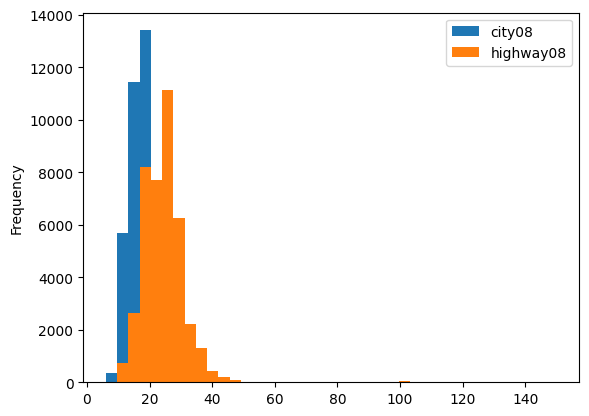

In [101]:
(raw_data
 .loc[:, ['city08', 'highway08']]
 .plot.hist(bins=40)
)

<AxesSubplot: ylabel='Frequency'>

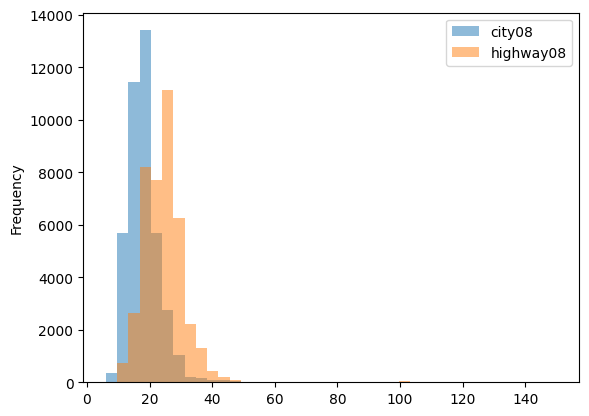

In [102]:
(raw_data
 .loc[:, ['city08', 'highway08']]
 .plot.hist(bins=40, alpha=0.5)
)

### Scatter Plots

Scatter plots are useful for visualizing the relationship between two continuous variables. You should use them when:

- You have two continuous variables.
- You want to see if there is a relationship between the variables.
- You want to see if the relationship is linear.
- You want to see if there are any outliers.

In pandas, you can create a scatter plot by calling the `.plot.scatter()` method on a DataFrame. You need to specify the x and y columns.

I like to adjust the alpha parameter to make the points more transparent so you can see the density of the points.

Let's look at the relationship between the engine displacement and the combined MPG.

<AxesSubplot: xlabel='displ', ylabel='comb08'>

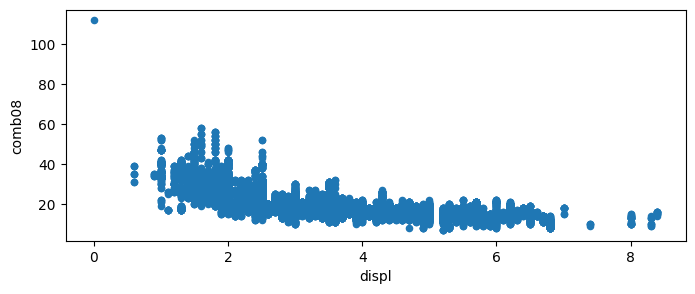

In [104]:
(raw_data
 .plot.scatter(x='displ', y='comb08', figsize=(8,3))
)

<AxesSubplot: xlabel='displ', ylabel='comb08'>

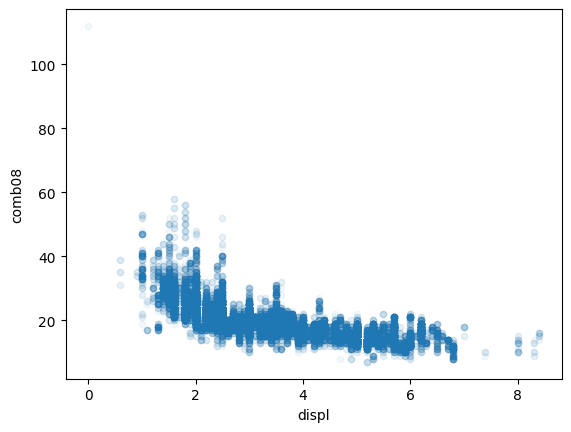

In [106]:
(raw_data
 .plot.scatter(x='displ', y='comb08', alpha=0.05)
)

<AxesSubplot: xlabel='displ', ylabel='comb08'>

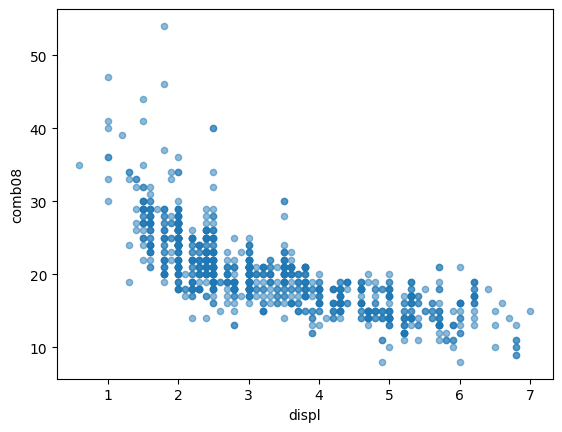

In [107]:
(raw_data
 .sample(1000)
 .plot.scatter(x='displ', y='comb08', alpha=0.5)
)

In [110]:
raw_data.displ.value_counts().sort_index()

displ
0.0      1
0.6      8
0.9      6
1.0    172
1.1     12
      ... 
7.0     10
7.4      4
8.0     25
8.3      9
8.4     11
Name: count, Length: 66, dtype: int64[pyarrow]

<AxesSubplot: ylabel='Frequency'>

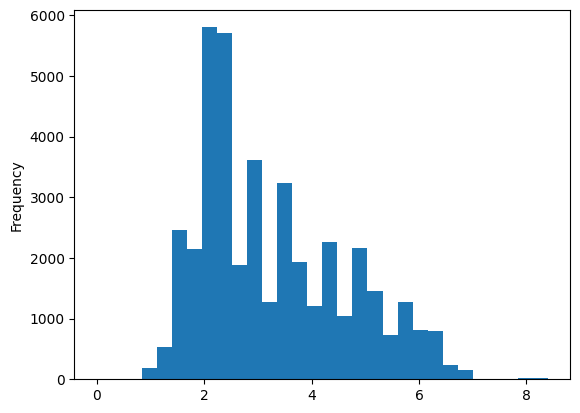

In [111]:
# note the "comb" shape of the histogram
(raw_data
 .displ
 .plot.hist(bins=30)
 )

<AxesSubplot: ylabel='Frequency'>

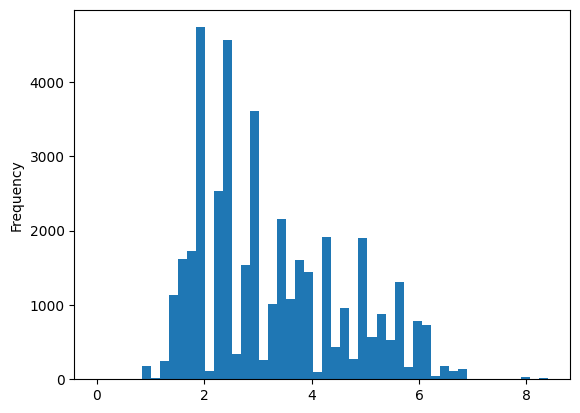

In [112]:
# note the "comb" shape of the histogram
(raw_data
 .displ
 .plot.hist(bins=50)
 )

<AxesSubplot: ylabel='Density'>

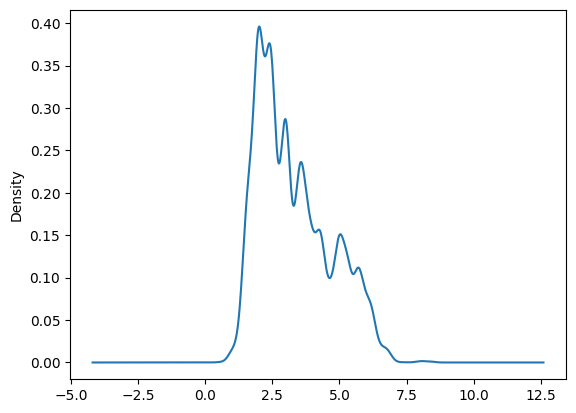

In [113]:
# note the "comb" shape of the histogram
(raw_data
 .displ
 .plot.kde()
 )

<AxesSubplot: xlabel='displ'>

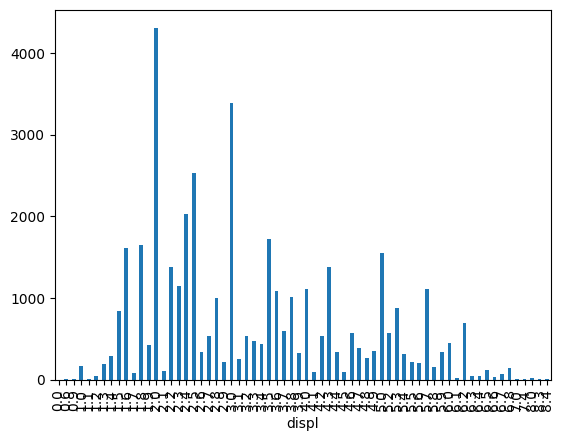

In [116]:
(raw_data
 .displ
 .value_counts()
 .sort_index()
 .plot.bar()
)

### PCA

In [117]:
from sklearn import decomposition, preprocessing, set_config
set_config(transform_output='pandas')
cols = ['barrels08','city08',
        'co2',
       'comb08', 'cylinders',
       'displ', 'fuelCost08', 'highway08', 'year',
       ]
X = (raw_data
 .loc[:, cols]
    .dropna()
    )

pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(preprocessing.StandardScaler().fit_transform(X))
X_pca

,pca0,pca1,pca2
0,1.075071,-1.744313,-0.542018
1,-5.803141,-0.515239,1.079690
2,2.877206,-1.514224,0.614133
3,-5.163462,-1.040983,-0.170337
4,0.087959,-1.248663,-0.927031
...,...,...,...
41139,1.344085,-1.212001,-0.397885
41140,1.713808,-1.163216,-0.162432
41141,0.939380,-1.256707,-0.636919
41142,0.939380,-1.256707,-0.636919


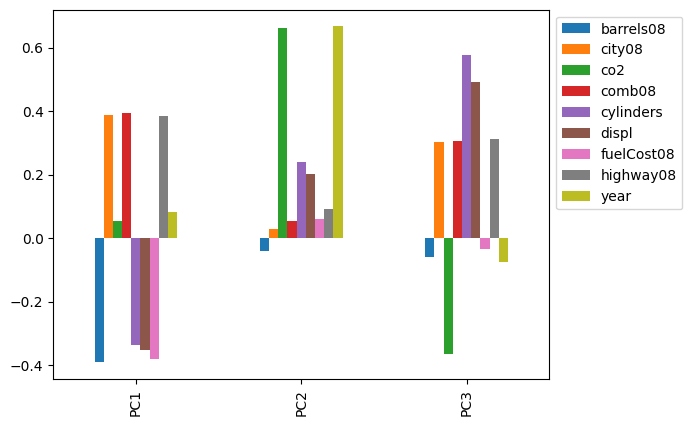

In [118]:
(pd.DataFrame(pca.components_, columns=cols, index=[f'PC{i+1}' for i in range(3)])
 .plot.bar()
 .legend(bbox_to_anchor=(1, 1))
)


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

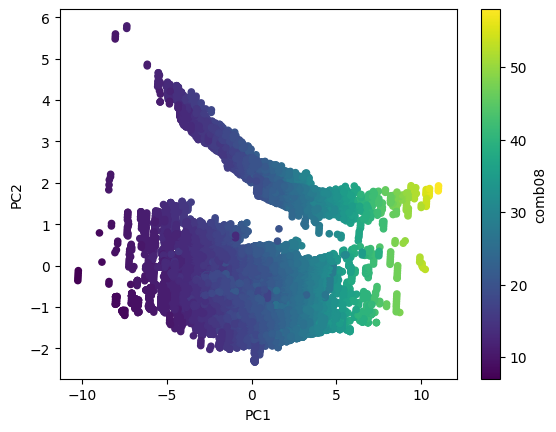

In [122]:
def fix_pc_columns(name):
    # change pca0 to PC1, pca1 to PC2, etc.
    return f'PC{int(name[3])+1}'
(X_pca
 .rename(columns=fix_pc_columns)
 .assign(**raw_data)
 .plot.scatter(x='PC1', y='PC2', c='comb08')
)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

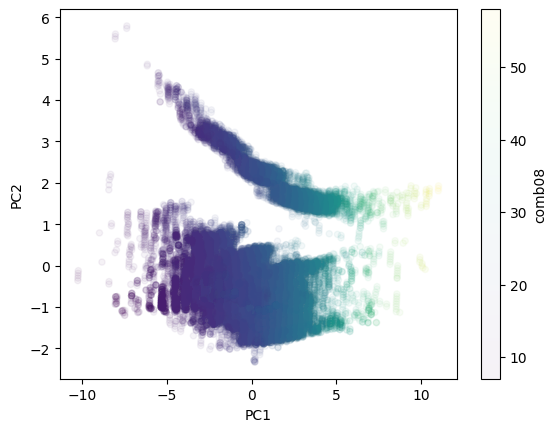

In [123]:
def fix_pc_columns(name):
    # change pca0 to PC1, pca1 to PC2, etc.
    return f'PC{int(name[3])+1}'
(X_pca
 .rename(columns=fix_pc_columns)
 .assign(**raw_data)
 .plot.scatter(x='PC1', y='PC2', c='comb08', alpha=0.05)
)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

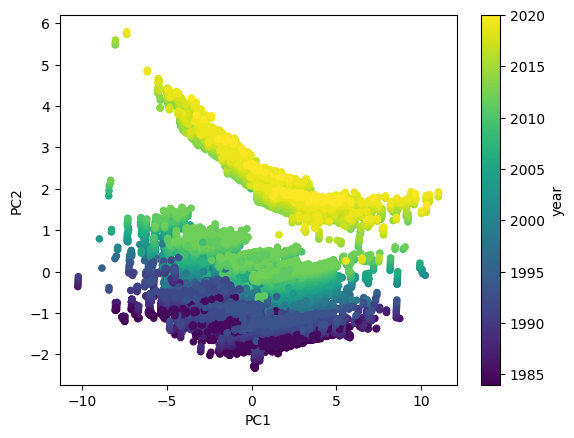

In [127]:
def fix_pc_columns(name):
    # change pca0 to PC1, pca1 to PC2, etc.
    return f'PC{int(name[3])+1}'
(X_pca
 .rename(columns=fix_pc_columns)
 .assign(**raw_data)
 .plot.scatter(x='PC1', y='PC2', c='year')
)

In [126]:
(raw_data
.groupby('year')
 ['co2']
 .mean()
)

year
1984          -1.0
1985          -1.0
1986          -1.0
1987          -1.0
1988          -1.0
1989          -1.0
1990          -1.0
1991          -1.0
1992          -1.0
1993          -1.0
1994          -1.0
1995          -1.0
1996          -1.0
1997          -1.0
1998     -0.996305
1999     -0.991784
2000     -0.995238
2001     -0.994512
2002     -0.997949
2003     -0.999042
2004          -1.0
2005          -1.0
2006          -1.0
2007          -1.0
2008     -0.999158
2009      0.934122
2010      1.925158
2011       1.90885
2012      2.124132
2013    420.601351
2014    414.103673
2015    404.778644
2016    391.883518
2017    392.481052
2018    389.793155
2019    387.862566
2020    371.712919
Name: co2, dtype: double[pyarrow]

## Summary

To work well with XGBoost, you need to have a strong foundation in Python and Pandas. This week's lessons covered the basics of Python functions, classes, and lambda functions, as well as Pandas methods like `.assign` and plotting. By mastering these concepts, you'll be well-prepared for the subsequent weeks of the course, where you'll dive into XGBoost and advanced data preprocessing techniques.